In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import random
from math import log, ceil
no_qubit = 3

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
color_codes = [0,1,2,3,4,5,6,7]
no_qubits = ceil(log(len(color_codes)))
random.shuffle(color_codes)
database = {} 
for i in range(8):
    database[i] = color_codes[i]
max_value = max(color_codes)
max_len_bin = len(bin(max_value)[2:])


In [3]:
desired_color_code = 5
print(database)

{0: 1, 1: 7, 2: 3, 3: 0, 4: 2, 5: 4, 6: 5, 7: 6}


In [4]:
DB = QuantumCircuit(2*no_qubits+1)

In [5]:
def DB_function(QC, color_code):
#if color_code == 0: do nothin
    max_len_bin = len(bin(7)[2:])
    d =  bin(color_code)[2:]
    l = len(d)
    d = (max_len_bin - l) *'0' + d
    k = []
    
    for i in range(len(d)):
        if d[i] == "1":
            k.append(i)

    for i in k:
        QC.mct([0,1,2],3+i)
        

In [6]:
def database1(dc, no_qubit):
    
    for i in range(8):
        l = bin(i)[2:]
        l = (max_len_bin - len(l)) * '0' +  l
        for j in range(len(l)):
            if l[j] == '0':
                dc.x(j)
        DB_function(dc, database[i])
    
        for j in range(len(l)):
            if l[j] == '0':
                dc.x(j)
    return dc

In [7]:
DB = database1(DB, no_qubit)

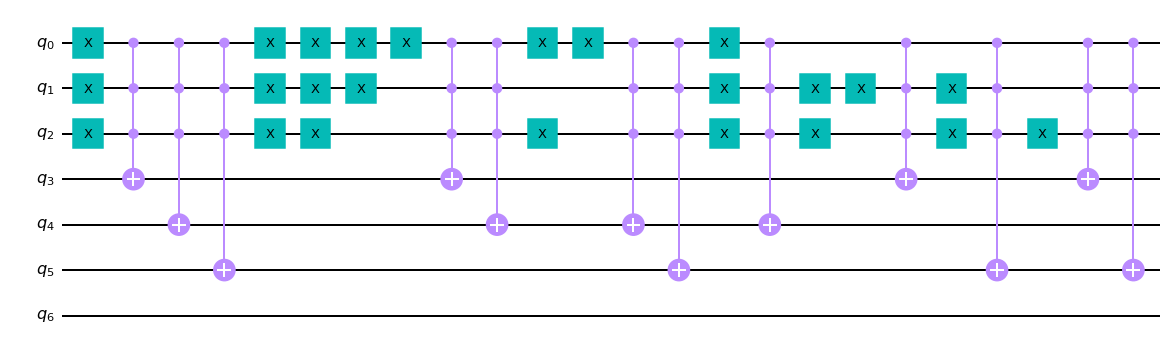

In [8]:
DB.draw()

In [9]:
def Marking_circuit(Mg, desired_color_code):
    l = bin(desired_color_code)[2:]
    l = (max_len_bin - len(l)) * '0' + l
    k = []
    for i in range(len(l)):
        if l[i] == '0':
            #print(len(l))
            Mg.x(i + 3)
    Mg.mct([(i+3) for i in range(3)],6)
    for i in range(len(l)):
        if l[i] == '0':
            Mg.x(i + 3)
    return Mg
    
    
    

In [10]:
MG = Marking_circuit(QuantumCircuit(2*no_qubits+1),desired_color_code)

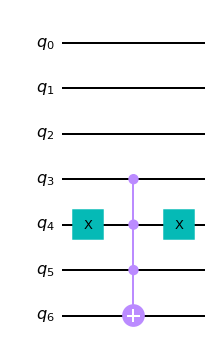

In [11]:
MG.draw()

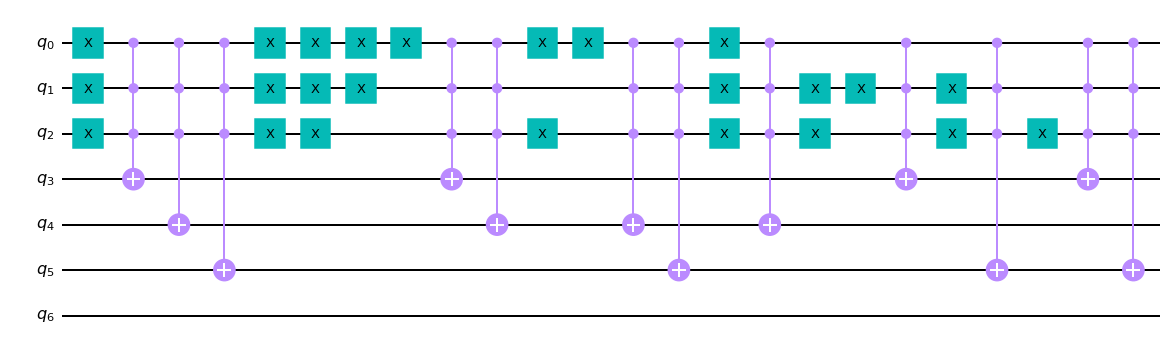

In [12]:
DB.draw()

/tmp/ipykernel_1190/4230864215.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  oracle = oracle + DB + MG + DB


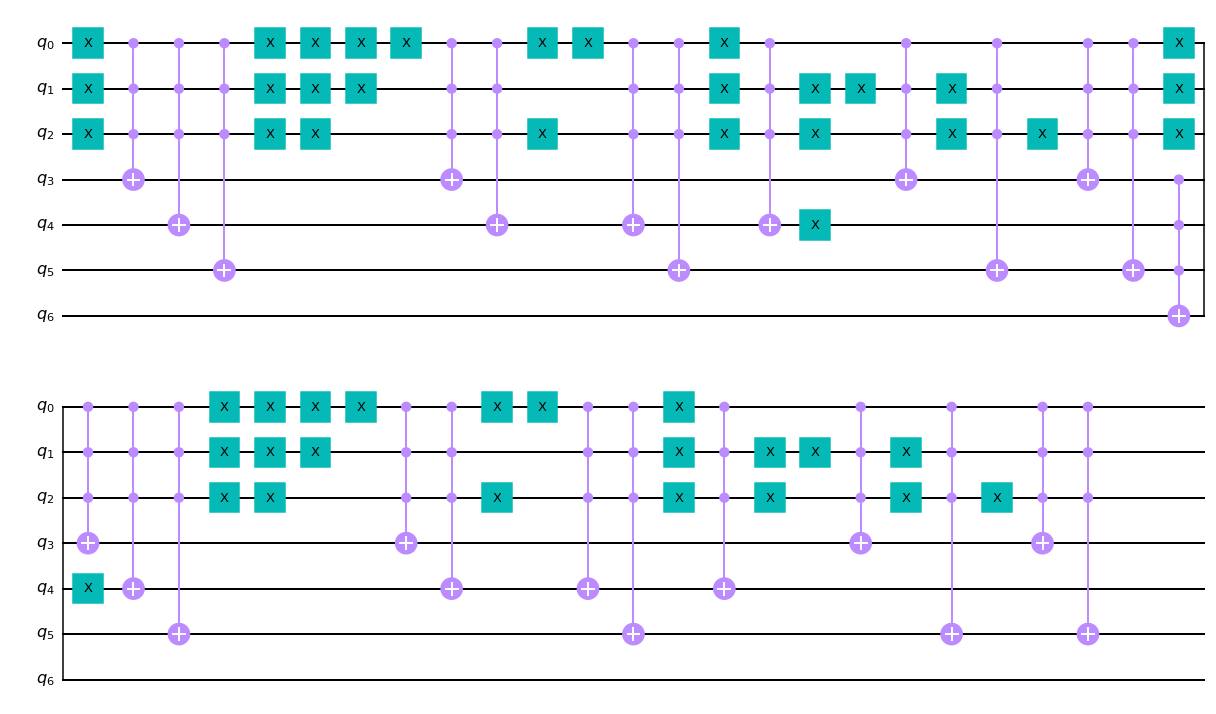

In [13]:
oracle = QuantumCircuit(2*no_qubits+1)
oracle = oracle + DB + MG + DB
oracle.draw()

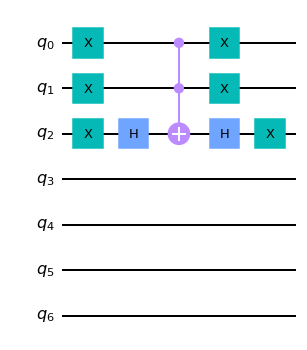

In [14]:
def phase_circuit(QC, n):
    for i in range(n):
        QC.x(i)
        if i == n-1:
            QC.h(i)
    QC.ccx(0,1,2)
    for i in range(n):
        if i == n-1:
            QC.h(i)
        QC.x(i)
    return QC
cir = QuantumCircuit(2*no_qubit+1)
phase = phase_circuit(cir, no_qubit) 
phase.draw()

In [15]:
Grover = QuantumCircuit(2*no_qubit+1)
Grover = Grover + oracle
for i in range(no_qubit):
    Grover.h(i)
Grover = Grover + phase
for i in range(no_qubit):
    Grover.h(i)

/tmp/ipykernel_1190/486833272.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + oracle
/tmp/ipykernel_1190/486833272.py:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + phase


In [16]:
circuit = QuantumCircuit(2*no_qubit+1,no_qubit)
circuit.x(6)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(6)
circuit = circuit + Grover
circuit.measure(0,2)
circuit.measure(1,1)
circuit.measure(2,0)


/tmp/ipykernel_1190/844059834.py:7: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = circuit + Grover


In [17]:
sim = Aer.get_backend('aer_simulator')
results = execute(circuit, sim, shots = 1000)
counts = results.result().get_counts()

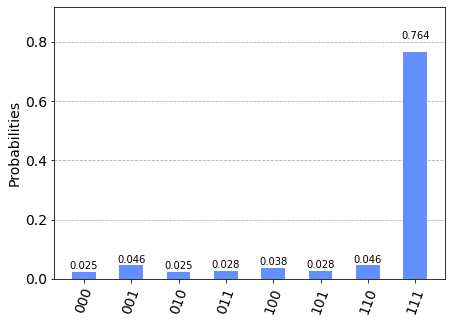

In [18]:
plot_histogram(counts)